69.10,164000000000.00
156.68,138148209366.39
244.27,123859352142.11
331.85,110158722358.72
419.44,104211940836.94
507.02,96555746943.12
594.61,90591256294.73
682.19,85560872868.63
769.78,80530489442.53
857.36,75500106016.43
944.95,71876842657.34
1032.53,68744000000.00
1120.12,65611157342.66
1207.70,63609410984.85
1295.29,61939824810.61
1382.87,60270238636.36
1470.46,58569933333.33
1558.04,56643066666.67
1645.63,54716200000.00
1733.21,52789333333.33
1820.80,50862466666.67
1908.38,49434024013.72
1995.97,48409446540.88
2083.55,47384869068.04
2171.14,46360291595.20
2258.72,45335714122.36
2346.31,44311136649.51
2433.89,43432265356.27
2521.48,42698446355.45
2609.06,41964627354.63
2696.65,41230808353.81
2784.23,40496989352.99
2871.82,39763170352.17
2959.40,39029351351.35
3046.98,38295532350.53
3134.57,37573484474.37
3222.15,37065276094.28
3309.74,36557067714.18
3397.32,36048859334.08
3484.91,35540650953.98
3572.49,35032442573.89
3660.08,34524234193.79
3747.66,34016025813.69
3835.25,3350781743

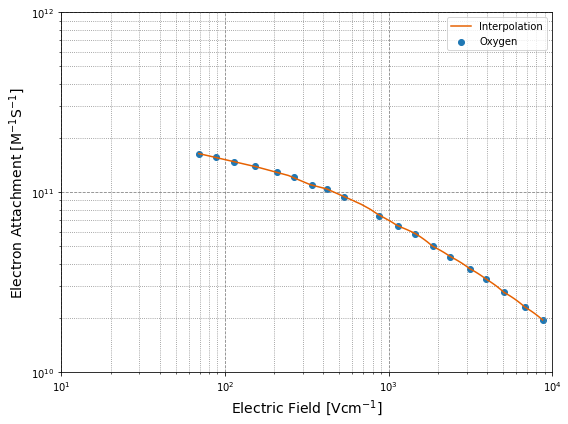

In [3]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator,AutoMinorLocator
from scipy.optimize import curve_fit
import numpy as np
import pandas as pd 
from scipy.interpolate import interp1d


colors = ['#1f78b4', '#e66101', '#33a02c', '#984ea3']

data = pd.read_csv('../data/electron_attachment.txt', sep=",")
data.columns = ['Electric Field', 'Attachment']

fig = plt.figure(figsize=(8,6))
ax = fig.gca()
plt.xlim(1E1,1E4)
plt.ylim(1E10,1E12)
plt.xlabel('Electric Field [$\mathrm{V} \mathrm{cm}^{-1}$]', fontsize=14)
plt.ylabel(r'Electron Attachment [$\mathrm{M}^{-1} \mathrm{S}^{-1}$]', fontsize=14)
plt.xscale('log')
plt.yscale('log')
ax.grid(b=True, which='major', color='grey', linestyle='--')
ax.grid(b=True, which='minor', color='grey', linestyle=':')

f2 = interp1d(data['Electric Field'], data['Attachment'], kind='linear')
xnew = np.linspace(np.min(data['Electric Field']), np.max(data['Electric Field']), 100)

for x,y in zip(xnew, f2(xnew)):
    print('%.2f,%.2f' % (x,y))

plt.scatter(data['Electric Field'], data['Attachment'], label='Oxygen', color=colors[0])
plt.plot(xnew, f2(xnew), label='Interpolation', color=colors[1])
ax.legend(loc='upper right')

fig.tight_layout()
plt.savefig('ElectronAttachment.pdf')
plt.show()